In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error,classification_report, confusion_matrix, accuracy_score
, r2_score
import seaborn as sns

In [29]:
df = pd.read_csv(r"marketing_and_product_performance.csv")

In [30]:
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [31]:
df.dtypes

Campaign_ID                           object
Product_ID                            object
Budget                               float64
Clicks                                 int64
Conversions                            int64
Revenue_Generated                    float64
ROI                                  float64
Customer_ID                           object
Subscription_Tier                     object
Subscription_Length                    int64
Flash_Sale_ID                         object
Discount_Level                         int64
Units_Sold                             int64
Bundle_ID                             object
Bundle_Price                         float64
Customer_Satisfaction_Post_Refund      int64
Common_Keywords                       object
dtype: object

In [32]:
df.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [33]:
df1 = df.drop(columns=['Campaign_ID', 'Product_ID','Customer_ID','Flash_Sale_ID','Bundle_ID'])

In [34]:
df1.head()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Tier,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,41770.45,4946,73,15520.09,1.94,Premium,4,43,34,433.80,4,Affordable
1,29900.93,570,510,30866.17,0.76,Premium,4,28,97,289.29,2,Innovative
2,22367.45,3546,265,32585.62,1.41,Basic,9,51,160,462.87,4,Affordable
3,29957.54,2573,781,95740.12,3.32,Premium,32,36,159,334.16,1,Durable
4,36277.19,818,79,81990.43,3.53,Standard,29,20,52,371.67,2,Affordable


In [35]:
cat_cols = ['Subscription_Tier','Common_Keywords']

In [36]:
df1[cat_cols] = df1[cat_cols].astype('category')
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

In [37]:
df1.dtypes

Budget                               float64
Clicks                                 int64
Conversions                            int64
Revenue_Generated                    float64
ROI                                  float64
Subscription_Length                    int64
Discount_Level                         int64
Units_Sold                             int64
Bundle_Price                         float64
Customer_Satisfaction_Post_Refund      int64
Subscription_Tier_Premium               bool
Subscription_Tier_Standard              bool
Common_Keywords_Durable                 bool
Common_Keywords_Innovative              bool
Common_Keywords_Stylish                 bool
dtype: object

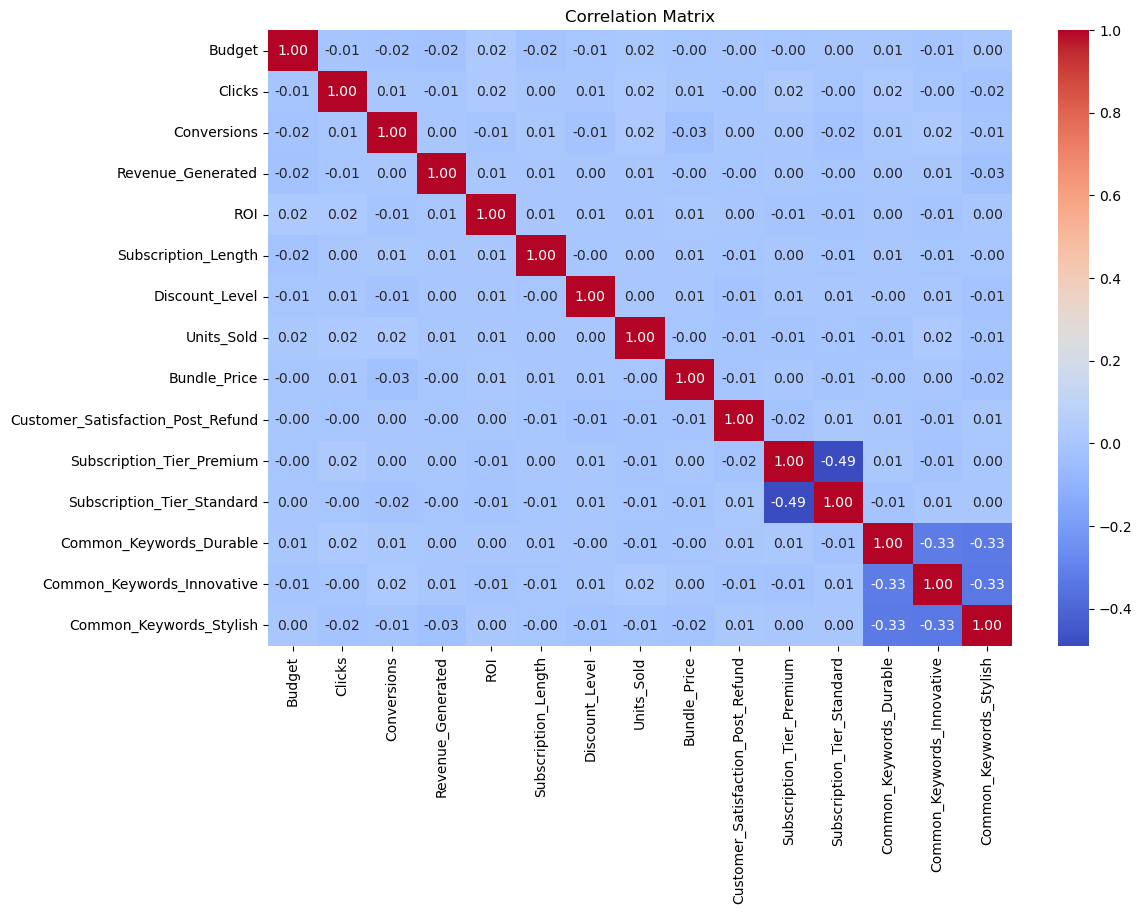

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [39]:
#normalize Discount_Level if it's percentage
if df1['Discount_Level'].max() > 1:
    df1['Discount_Level'] = df1['Discount_Level'] / 100

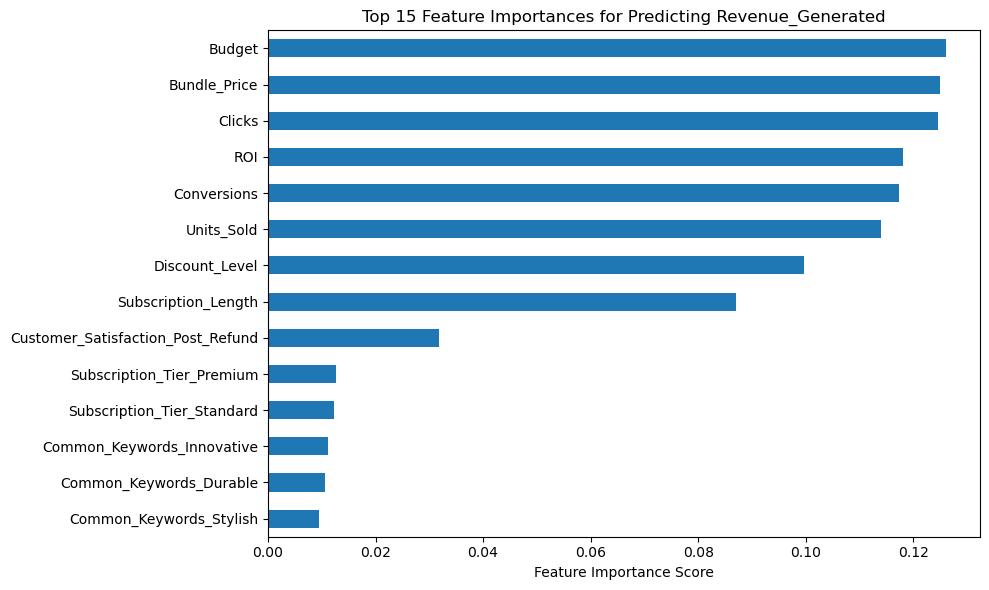

In [40]:
#Random Forest
# Split features and target
X = df1.drop(columns=['Revenue_Generated'])
y = df1['Revenue_Generated']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted[:15].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances for Predicting Revenue_Generated')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

In [41]:
y_pred = rf.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: -0.03241853408637696
Mean Absolute Error: 25004.1111909


<Axes: xlabel='Revenue_Generated', ylabel='Count'>

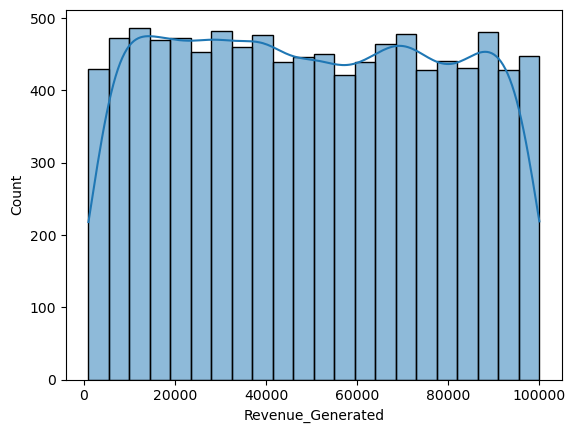

In [42]:
sns.histplot(df['Revenue_Generated'], kde=True)

In [43]:
df1['Log_Revenue'] = np.log1p(df1['Revenue_Generated'])


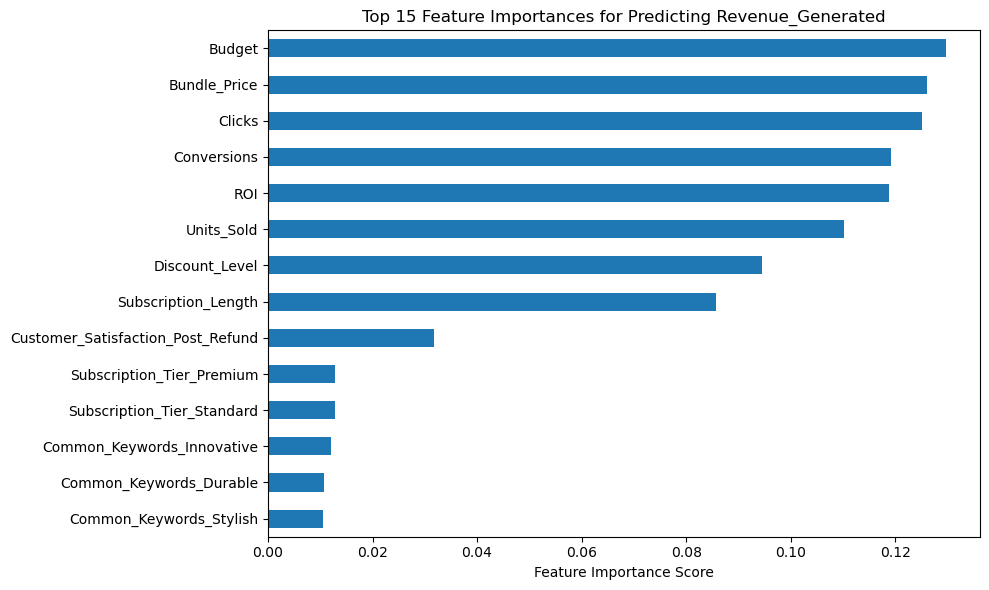

In [44]:
#Random Forest
# Split features and target
X = df1.drop(columns=['Log_Revenue','Revenue_Generated'])
y = df1['Log_Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted[:15].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances for Predicting Revenue_Generated')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

In [45]:
y_pred = rf.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: -0.033055140807274785
Mean Absolute Error: 0.7070448396270635


In [65]:
#Another Feature engineering
df1['Revenue_per_Click'] = df1['Revenue_Generated'] / (df1['Clicks'] + 1)
df1['Revenue_per_Unit'] = df1['Revenue_Generated'] / (df1['Units_Sold'] + 1)

In [67]:
df1['Discount_Percent'] = df1['Discount_Level'] / (df1['Bundle_Price'] + 1)


In [69]:
df1['Revenue_per_Budget'] = df1['Revenue_Generated'] / (df1['Budget'] + 1)


In [77]:
df1['Is_Premium'] = df1['Subscription_Tier_Premium']
df1.drop(columns=['Subscription_Tier_Standard'], inplace=True)


In [79]:
df1['Keyword_Score'] = (
    df1['Common_Keywords_Durable'] +
    df1['Common_Keywords_Innovative'] +
    df1['Common_Keywords_Stylish']
)


In [81]:
# clean-up
df1 = df1.fillna(0)
df1_encoded = pd.get_dummies(df1, drop_first=True)


In [85]:
X = df1.drop(columns=['Revenue_Generated', 'Log_Revenue'])  # drop original targets
y = df1['Log_Revenue']  # log-transformed revenue

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("R² (log-transformed):", r2_score(y_test, y_pred))

R² (log-transformed): 0.996909817638708


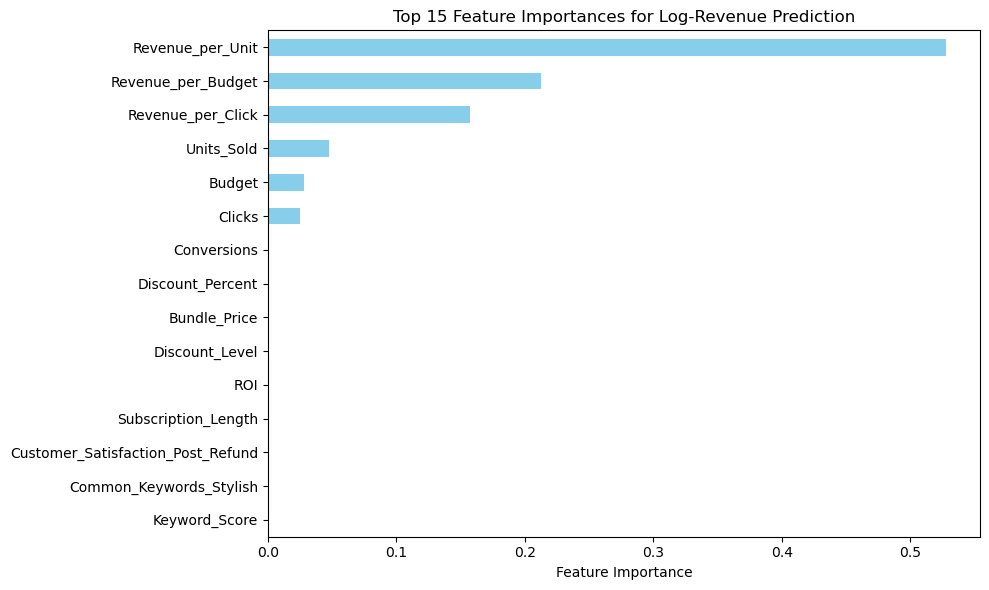

In [89]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True).tail(15)  # Top 15

# Plot
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title('Top 15 Feature Importances for Log-Revenue Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [93]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 5-fold cross-validation on log-transformed target
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Output
print("Cross-validated R² scores:", scores)
print("Average CV R²:", np.mean(scores))

Cross-validated R² scores: [0.99780848 0.99803395 0.99735339 0.99786879 0.99633281]
Average CV R²: 0.9974794854087564
